In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
mpg = pd.read_csv('mpg.csv')

<AxesSubplot:xlabel='cty', ylabel='hwy'>

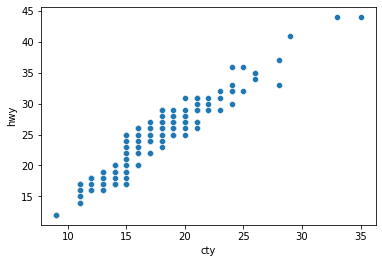

In [3]:
# Q1
sns.scatterplot(data = mpg, x = 'cty', y = 'hwy')

In [4]:
mw = pd.read_csv('midwest.csv')

[(0.0, 500000.0), (0.0, 10000.0)]

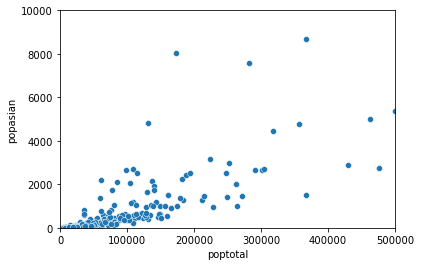

In [6]:
# Q2
sns.scatterplot(data = mw, x = 'poptotal', y = 'popasian').set(xlim = (0, 500000), ylim = (0, 10000))

In [7]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [11]:
# Q3
mpg_suv = mpg.query("category == 'suv'") \
            .groupby('manufacturer', as_index = False) \
            .agg(mean_cty = ('cty', 'mean')) \
            .sort_values('mean_cty') \
            .head()
mpg_suv

,manufacturer,mean_cty
5,lincoln,11.333333
4,land rover,11.500000
1,dodge,11.857143
0,chevrolet,12.666667
2,ford,12.888889


<AxesSubplot:xlabel='manufacturer', ylabel='mean_cty'>

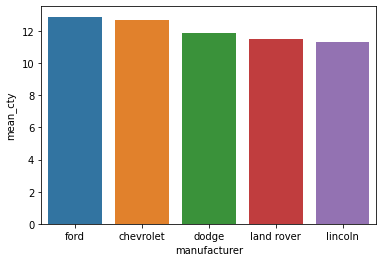

In [16]:
mpg_suv = mpg_suv.sort_values('mean_cty', ascending = False)
sns.barplot(data = mpg_suv, x = 'manufacturer', y = 'mean_cty')

In [19]:
# Q4
mpg_cat = mpg.groupby('category', as_index = False) \
            .agg(n = ('category', 'count')) \
            .sort_values('n', ascending = False)
mpg_cat

,category,n
6,suv,62
1,compact,47
2,midsize,41
5,subcompact,35
4,pickup,33
3,minivan,11
0,2seater,5


<AxesSubplot:xlabel='category', ylabel='n'>

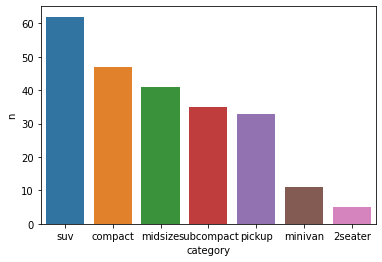

In [20]:
sns.barplot(data = mpg_cat, x = 'category', y = 'n')

In [22]:
eco = pd.read_csv('economics.csv')
eco.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [24]:
# Q5
eco['date2'] = pd.to_datetime(eco['date'])
eco['year'] = eco['date2'].dt.year
eco.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<AxesSubplot:xlabel='year', ylabel='psavert'>

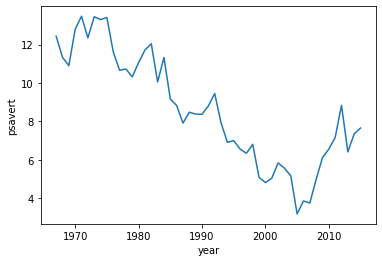

In [27]:
sns.lineplot(data = eco, x = 'year', y = 'psavert', ci = None)

In [29]:
# Q6
eco['month'] = eco['date2'].dt.month
eco.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year,month
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967,7
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967,8
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967,9
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967,10
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967,11


<AxesSubplot:xlabel='month', ylabel='psavert'>

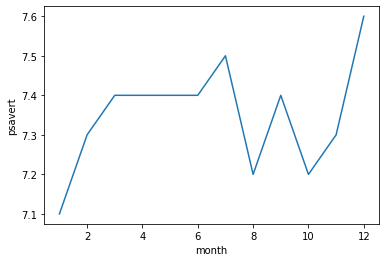

In [30]:
sns.lineplot(data = eco.query('year == 2014'), x = 'month', y = 'psavert', ci = None)

<AxesSubplot:xlabel='category', ylabel='cty'>

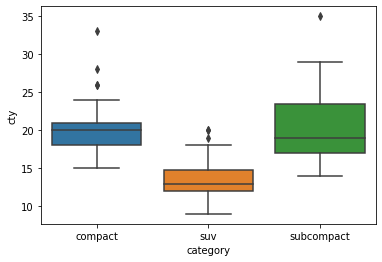

In [32]:
# Q7
mpg_cty = mpg.query('category in ["compact", "subcompact", "suv"]')
sns.boxplot(data = mpg_cty, x = 'category', y = 'cty')